# k-means Clustering

## Table of contents

[1.) Simple k-means clustering example](#section_1)<br>
[1.1) SW10 - Task 1 - Excerice b](#section_11)<br>
[1.2) SW10 - Task 1 - Excercise c](#section_12)<br>
[2.) Image segmentation](#section_2)<br>
[2.1) SW10 - Task 1 - Excercise d](#section_13)<br>
[2.2) SW10 - Task 1 - Excercise e](#section_14)<br>
[2.3) SW10 - Task 1 - Excercise f](#section_15)<br>
[3.) 3D point cloud segmentation](#section_3)<br>
[3.1) SW10 - Task 1- Excercise g&h](#section_16)<br>
[4.) Finding clusters in the apartment data](#section_4)<br>
[4.1) SW10 - Task 2- Excercise b](#section_17)<br>
[4.2) SW10 - Task 2- Excercise c](#section_18)<br>
[4.3) SW10 - Task 2- Excercise d](#section_19)<br>
[4.4) SW10 - Task 2- Excercise e](#section_20)<br>
[4.5) SW10 - Task 2- Excercise f](#section_21)<br>
[4.6) SW10 - Task 2- Excercise g](#section_22)<br>

## Libraries and settings

In [7]:
# Install opencv-python-headless (neccessary in GitHub Codespaces)
#!pip install --upgrade pip
#!pip install opencv-python-headless

# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('\nCurrent working directory:', os.getcwd())


Current working directory: /Users/john/School/Sem5/DA/data_analytics/Week_10


## 1.) Simple k-means clustering example
<a id='section_1'></a>

### Create the dataset

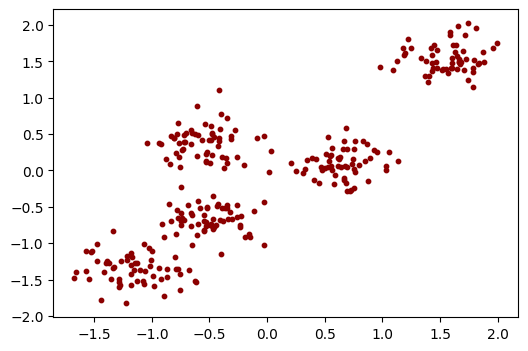

In [4]:
# Create data
centers = [[2,1], [-2,2], [-2,-2], [-4,-5], [5,7]]
X, y = make_blobs(n_samples=300, 
                  centers=centers, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

### Elbow Method showing the optimal k

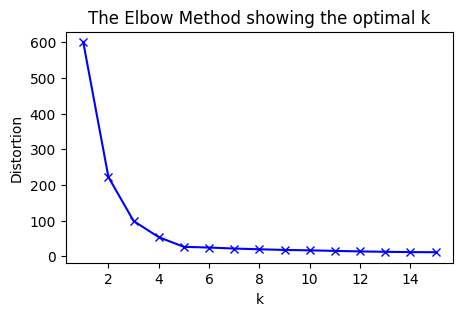

In [5]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

#### SW10 - Task 1 - Excerice b
<a id='section_11'></a>

<p>
With the help of the Elbow Method, I would say that 5 is the optimal k for this clustering model
</P>

### Perform k-means clustering

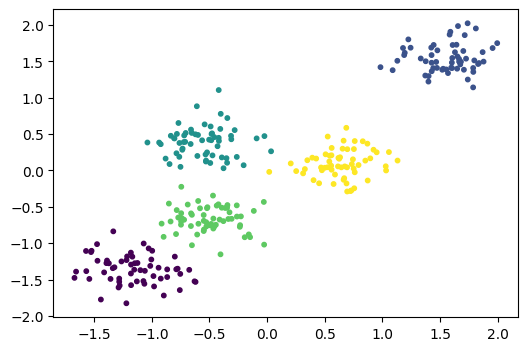

In [32]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

### Get and check the converged cluster centroids

In [8]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[-1.16214999 -1.36217282]
 [ 1.56276666  1.54186443]
 [-0.55467879  0.3889481 ]
 [-0.49867406 -0.67040574]
 [ 0.64167824  0.09023659]] 

The 1st cluster's centroid:
x = -1.16214999
y = -1.36217282


### Get the inertia or 'within-cluster sum-of-squares (WCSS)' of the k-means model

In [9]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 26.3487


### Perform Silhouette Analysis
- For examples see:
- https://laid-back-scientist.com/en/k-means
- https://machinelearninggeek.com/evaluating-clustering-methods
- https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

k=2, Silhouette Score: 0.5325


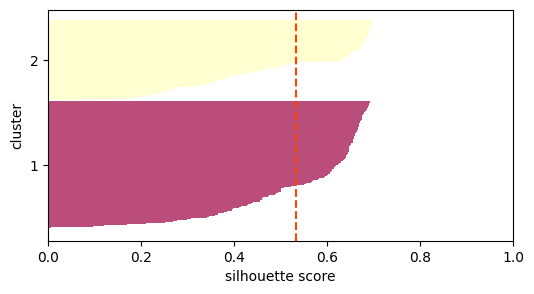

k=3, Silhouette Score: 0.5659


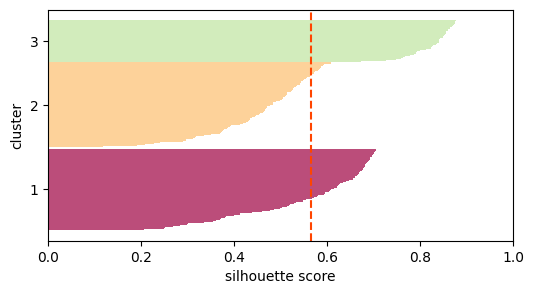

In [10]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in [2,3]:
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

### SW10 - Task 1 -  Excercise c
<a id='section_12'></a>

</p>
Perform a Sihlhouette Anlysis for different vallues of k. Use = 2,3,4,5,6,7,8,10, 11. 
You can implement this in the for loop by replacing the code line: </p>
<p>for i in [2,3]: </p>
<p>by </p>
<p>for i in range(2,12,1):</p>


k=2, Silhouette Score: 0.5325


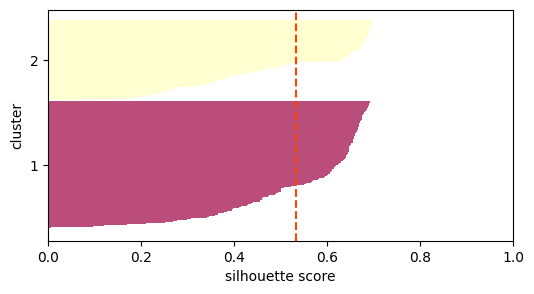

k=3, Silhouette Score: 0.5659


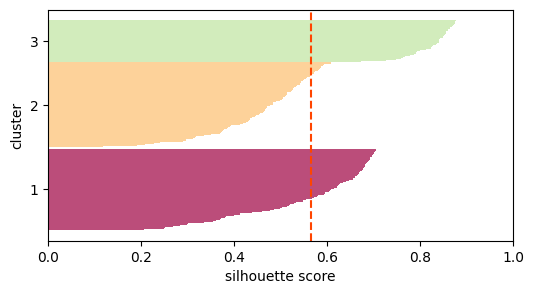

k=4, Silhouette Score: 0.6257


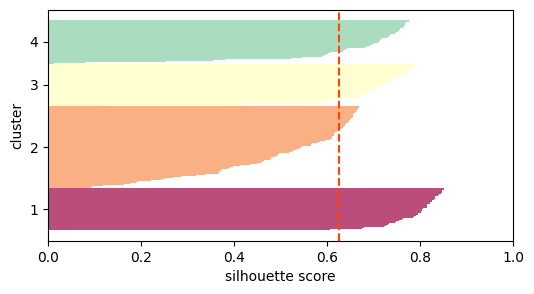

k=5, Silhouette Score: 0.6597


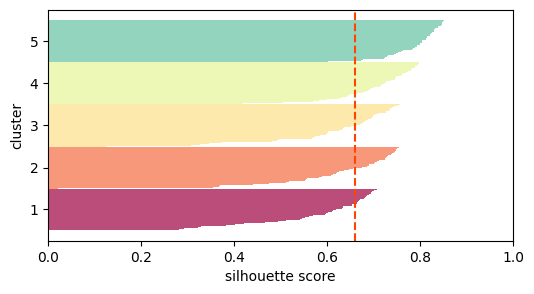

k=6, Silhouette Score: 0.6110


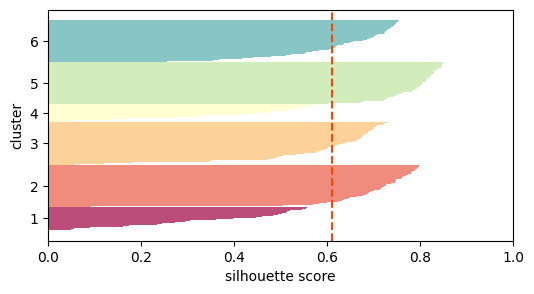

k=7, Silhouette Score: 0.5223


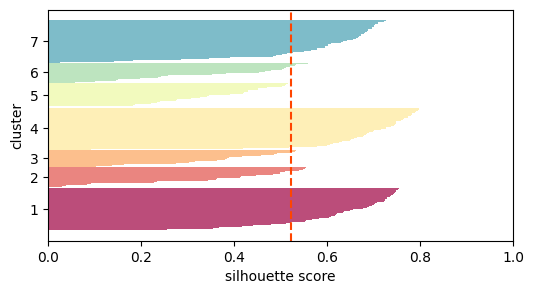

k=8, Silhouette Score: 0.4926


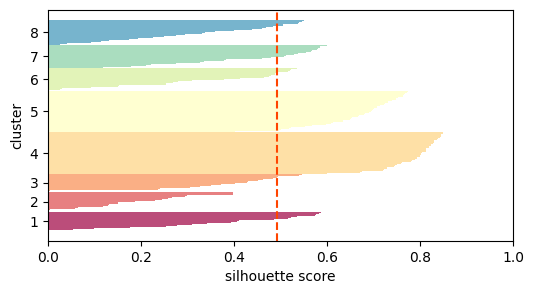

k=9, Silhouette Score: 0.4076


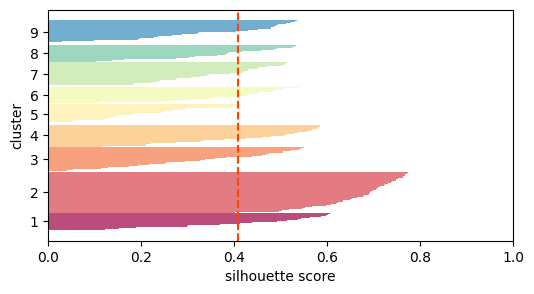

k=10, Silhouette Score: 0.4020


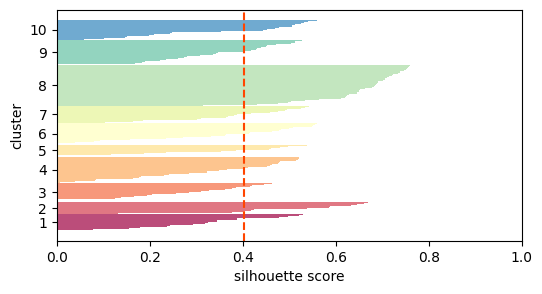

k=11, Silhouette Score: 0.3349


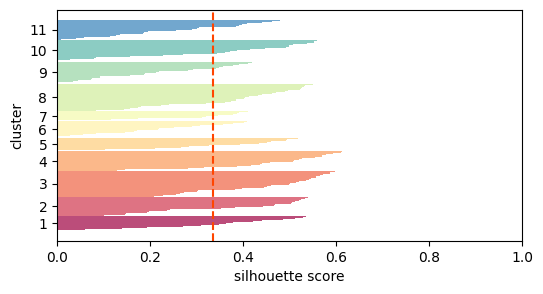

In [33]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in range(2, 12, 1):
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

## 2.) Image segmentation
<a id='section_2'></a>

### Read the image

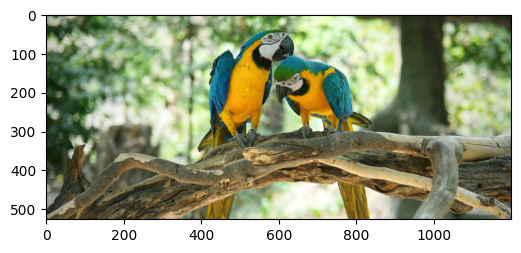

In [11]:
# Read the image
image = cv2.imread('parrot.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

### Reshape the image

In [12]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[ 37.,  68.,  37.],
       [ 37.,  70.,  39.],
       [ 43.,  76.,  45.],
       ...,
       [102., 112., 113.],
       [102., 114., 114.],
       [102., 114., 114.]], dtype=float32)

### Elbow method showing the optimal k

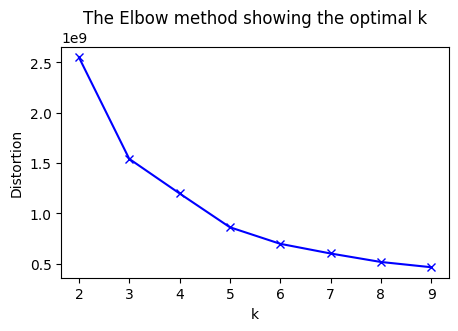

In [35]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')


plt.show()

### Perform image segmentation

In [14]:
# Number of clusters
k = 5

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[2]
 [2]
 [2]
 ...
 [4]
 [4]
 [4]] 

Centroids of 5 clusters
[[161.7978   176.42497  131.57068 ]
 [206.1085   142.65912   10.698247]
 [ 53.6455    63.024746  40.379005]
 [217.82266  229.63536  192.77307 ]
 [104.76609  113.03692   78.56786 ]]


### Change data types and reshape the segmented data for visualization

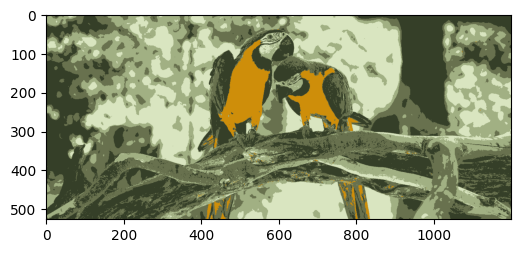

In [15]:
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

### SW10 - Task 1 -  Excercise d
<a id='section_13'></a>

</p>
Find another .jpg image and run the Jupyter notebook to perform:</p>
<p>imgae segmentation for your own image</p>
<p>Note: That lagrge image files can dramatically increase the computation time, so it's recommended to use image files with a size < 500 KB.</p>


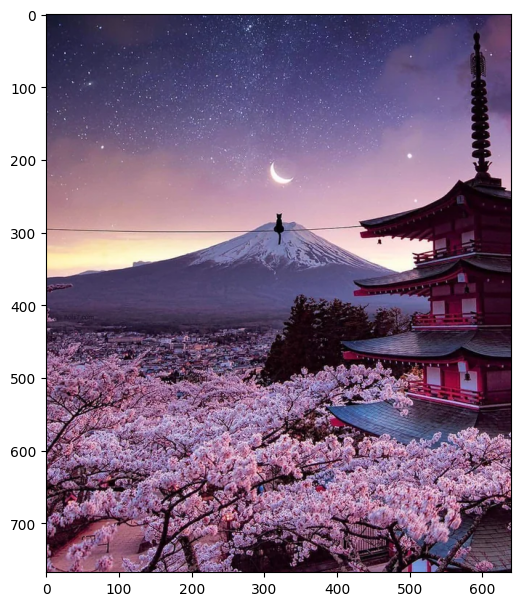

In [50]:
# Read the image
image2 = cv2.imread('mt_fuji_japan.jpg')
 
# Change the color to RGB (from BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image2)

In [51]:
#Reshape the image into a 2D array of pixels and 3 color values (RGB)

pixel_vals = image2.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[25., 24., 47.],
       [25., 24., 47.],
       [25., 24., 47.],
       ...,
       [25., 13., 19.],
       [22., 10., 16.],
       [14.,  1.,  8.]], dtype=float32)

### SW10 - Task 1 -  Excercise e
<a id='section_14'></a>

<p>
Use thge elbow method to determine the optimal number of clusters k for the segmentation of your image
</p>

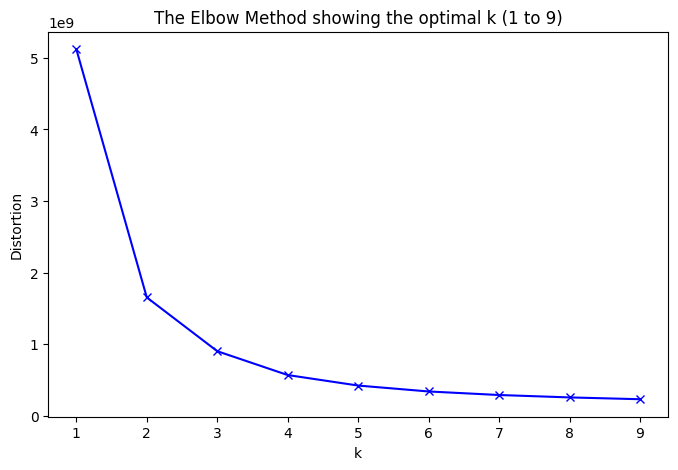

In [55]:
#Elbow Method showing the optimal k

# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's (von 2 bis 7)
K = range(1, 10, 1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (1 to 9)')
plt.show()

### SW10 - Task 1 -  Excercise f
<a id='section_15'></a>

<p>
Create 4 different image segmentations for your image based on different numbers of clusters k and plot the images
</p>

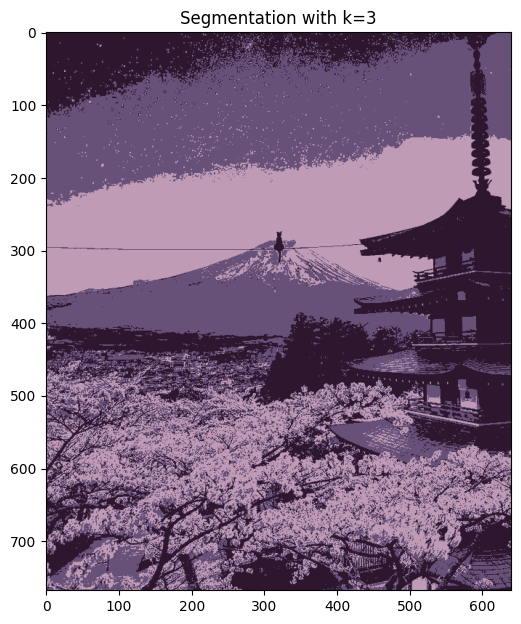

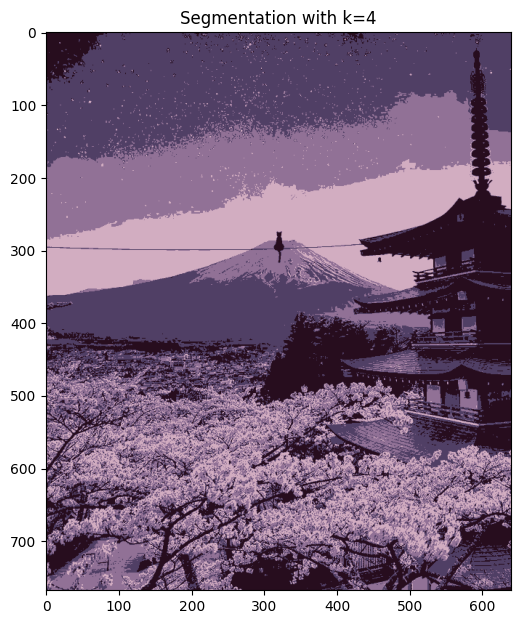

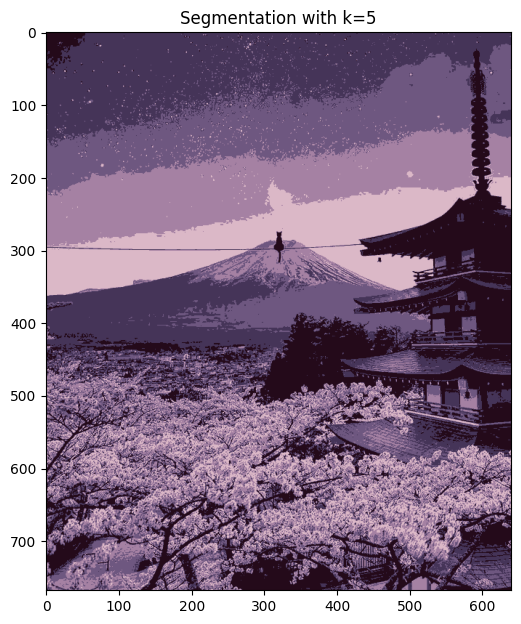

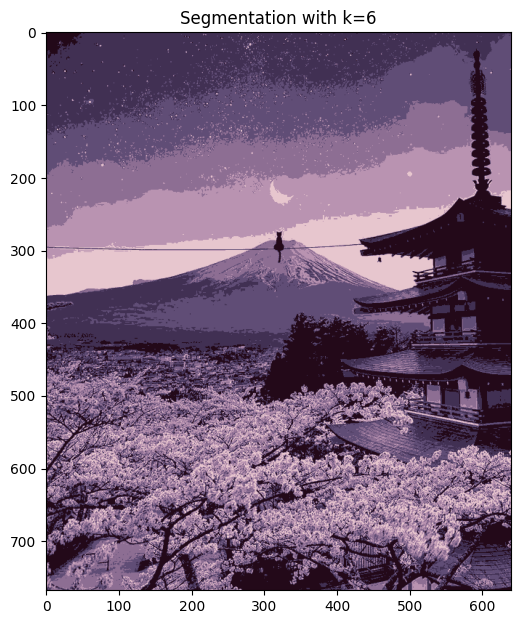

In [58]:
# Define a range of k values
k_values = [3, 4, 5, 6]

# Plot each k value
for k in k_values:
    # Criteria for the segmentation algorithm to stop running
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, 
                                        k, 
                                        None, 
                                        criteria, 
                                        10, 
                                        cv2.KMEANS_RANDOM_CENTERS)

    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image2.shape))

    # Show result
    plt.figure(figsize=(6, 8))
    plt.imshow(segmented_image)
    plt.title(f'Segmentation with k={k}')
    plt.show()

## 3.) 3D point cloud segmentation
- For details see: https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8
- Data-Viewer: https://app.flyvast.com/flyvast/app/page-snapshot-viewer.html#/444/9b557b91-8f41-16fa-cd2d-3476a1756611
<a id='section_3'></a>

### Import the data (Airport LIDAR point cloud dataset)

In [59]:
# Import the data
data = "KME_planes.xyz"
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)
# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
print(np.mean(z).round(4))

# Subset of the point cloud 
mask = (z > np.mean(z)) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]

spatial_query.shape

5.2829


(9676, 3)

### 3D plot of the point cloud subset

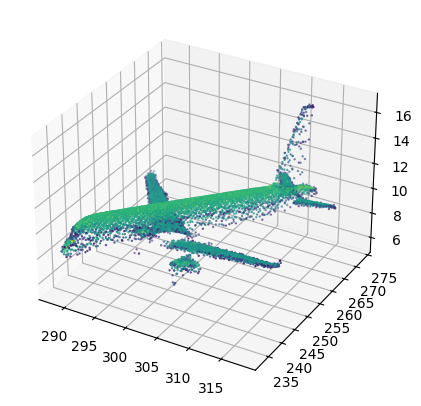

In [60]:
# 3D plot of the subset
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=intensity[mask], s=0.5)
plt.show()

### 2D plot of the point cloud subset

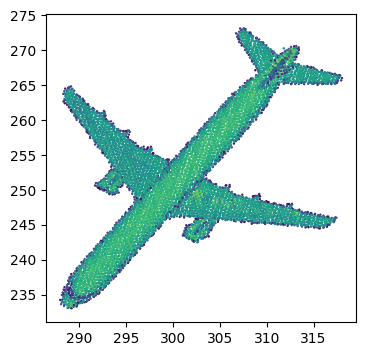

In [61]:
# 2D plot of the subset
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.5)
plt.show()

### Elbow method showing the optimal k

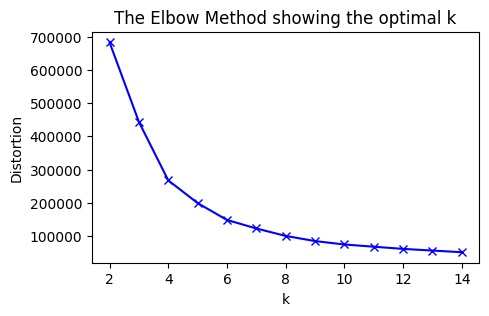

In [62]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spatial_query)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Point cloud segmentation based on k-means clustering

In [63]:
# Define number of clusters
k = 5

# Stack with x,y,z values
X2 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

### 2D plot of the segmented point cloud

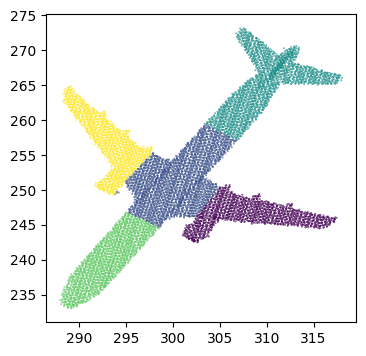

In [64]:
# 2D plot of image segmentation
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s = 0.1)
plt.show()

### 3D plot of the segmented point cloud

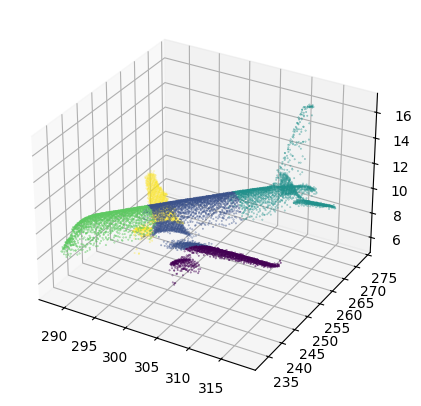

In [65]:
# 3D plot of image segmentation
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
plt.show()

### Calculate the Silhouette Score

In [66]:
print(f'Silhouette Score: {silhouette_score(X2, kmeans_aerpl.labels_):.4f}')

Silhouette Score: 0.4703


### SW10 - Task 1 -  Excercise g&h
<a id='section_16'></a>

<p>Change the value of k to provide different 3D point cloud sementations of the airport data</p>
<p>State wath you can see from your changes</p>

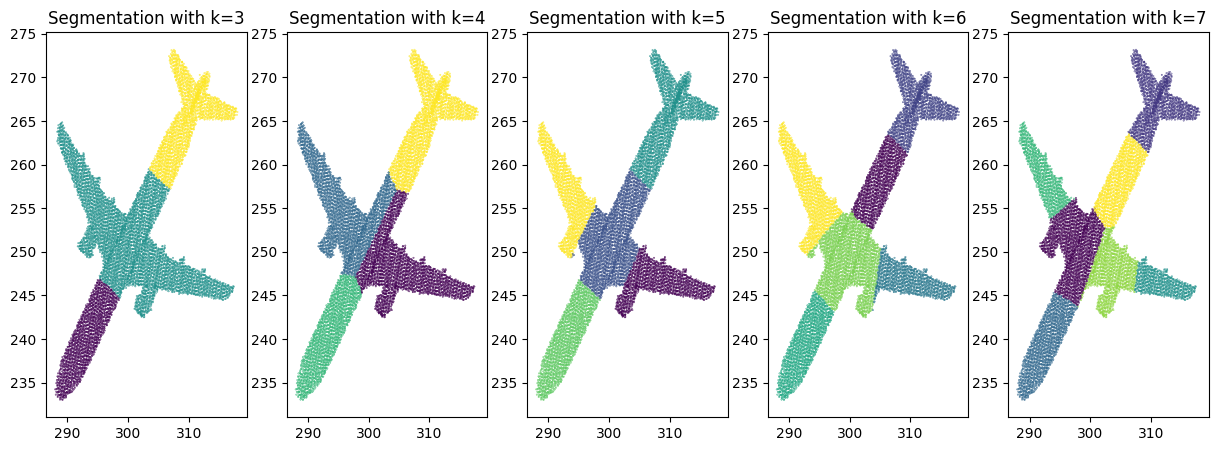

In [72]:
# Define a range of k values
k_values = [3, 4, 5, 6, 7]


# Create a subplot with multiple images
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    # Perform k-means clustering
    kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

    # 2D plot of image segmentation
    plt.subplot(1, len(k_values), i)
    plt.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s=0.1)
    plt.title(f'Segmentation with k={k}')

plt.show()


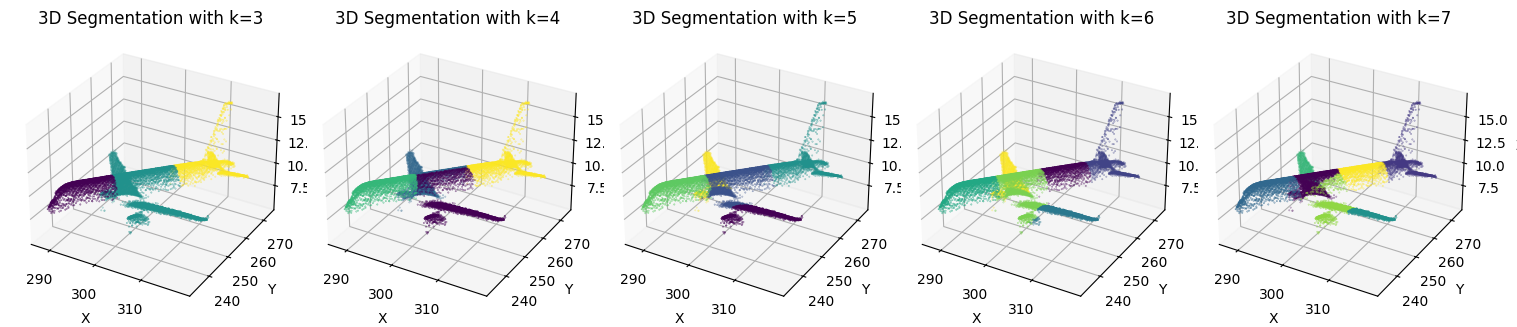

In [84]:
# Define a range of k values
k_values = [3, 4, 5, 6, 7]

# Create subplots for 3D plots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5), subplot_kw={'projection': '3d'})

for i, k in enumerate(k_values, 1):
    # Perform k-means clustering
    kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

    # 3D plot of image segmentation
    ax = axes[i-1]
    ax.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
    ax.set_title(f'3D Segmentation with k={k}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()


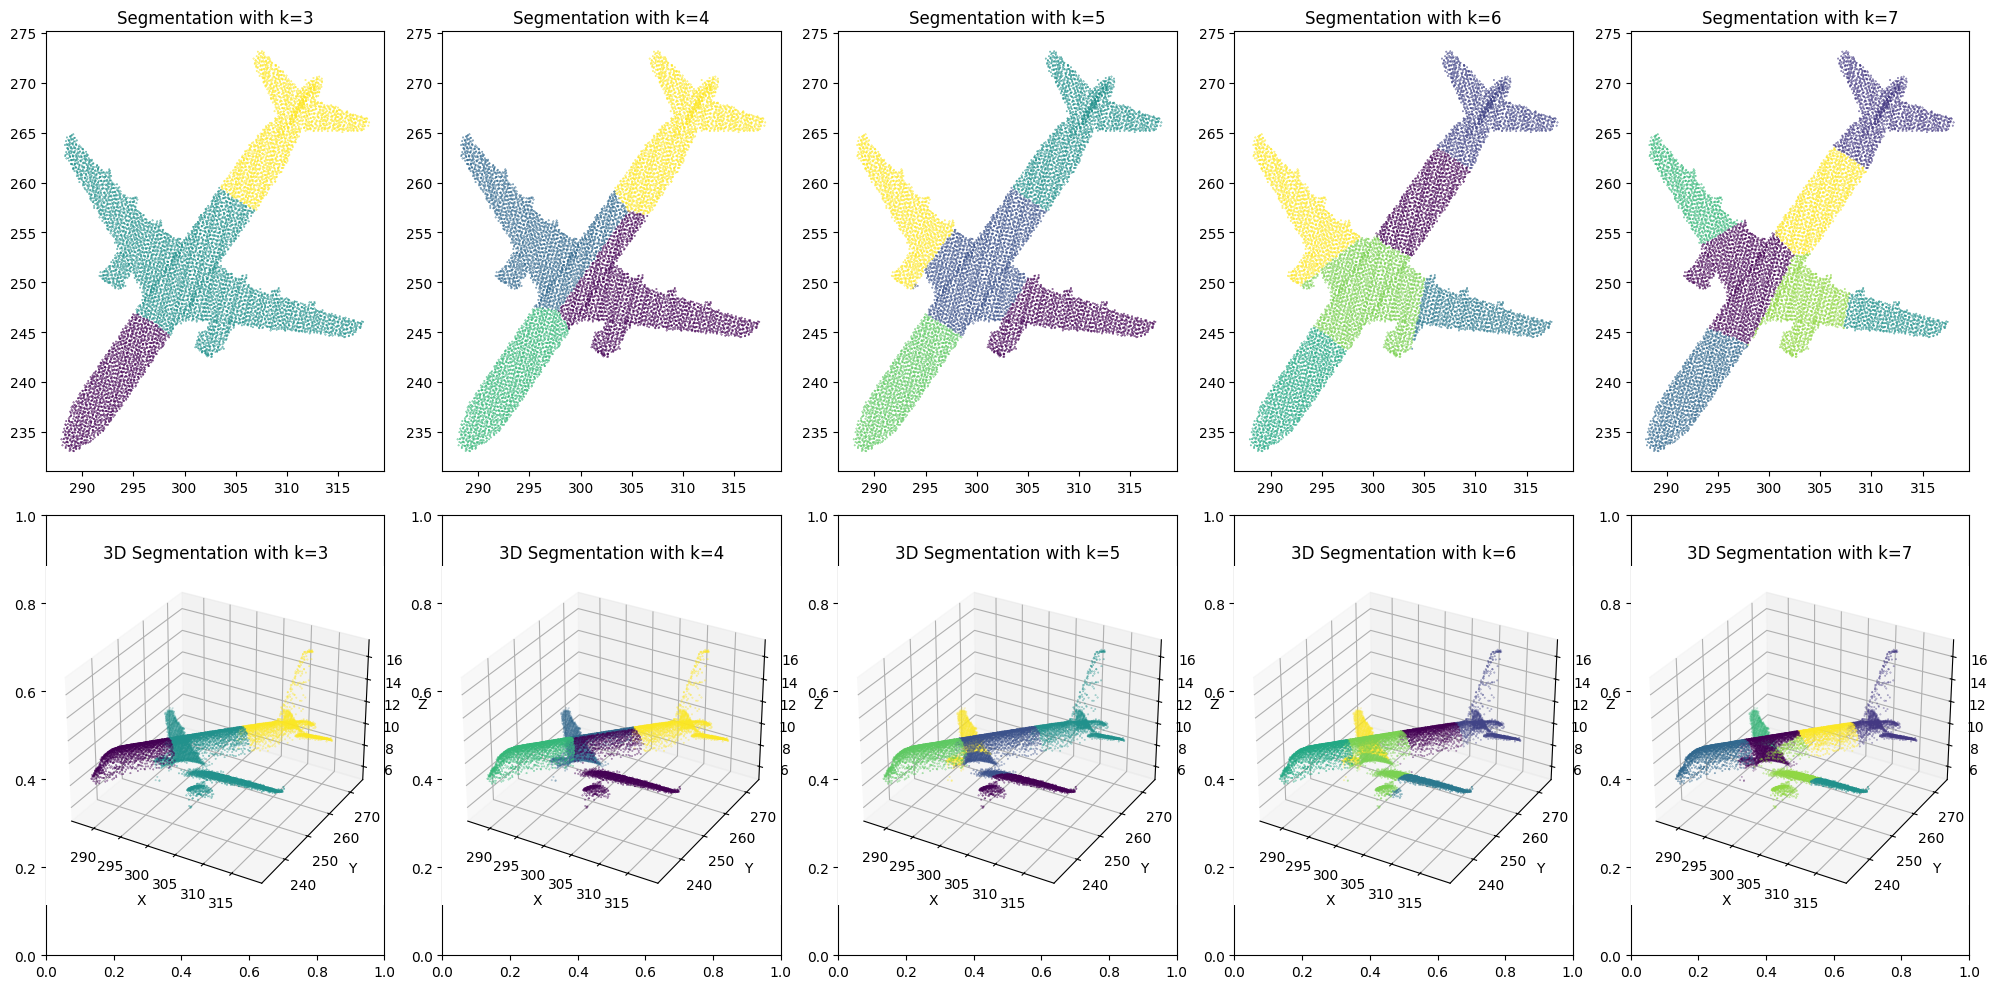

In [88]:
# Define a range of k values
k_values = [3, 4, 5, 6, 7]

# Create a subplot with multiple images
fig, axes = plt.subplots(2, len(k_values), figsize=(20, 10))

for i, k in enumerate(k_values, 0):
    # Perform k-means clustering
    kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

    # 2D plot of image segmentation
    ax1 = axes[0, i]
    ax1.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s=0.1)
    ax1.set_title(f'Segmentation with k={k}')

    # 3D plot of image segmentation
    ax2 = axes[1, i]
    ax2 = fig.add_subplot(2, len(k_values), i + 1 + len(k_values), projection='3d')
    ax2.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
    ax2.set_title(f'3D Segmentation with k={k}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


<p>Conclusion:</p>
<p>Increasing the value of K in the context of 3D point cloud segmentation with K-means clustering results in a higher level of subdivision or segmentation. Each cluster represents a distinct region or segment in the point cloud. So, higher K values lead to a finer partitioning of the data. </p>



## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

### Import the apartment data

In [148]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


id                           address_raw  rooms  area  \
0    1693998201-1     Neuhusstrasse 6, 8630 Rüti ZH, ZH    3.0    49   
1  1693998233-172   Widacherstrasse 5, 8630 Rüti ZH, ZH    3.0   111   
2  1693998256-331         Widenweg 14, 8630 Rüti ZH, ZH    3.0    58   
3  1693998265-381              Rain 1, 8630 Rüti ZH, ZH    4.0   118   
4  1693998276-419  Bachtelstrasse 24b, 8630 Rüti ZH, ZH    3.0    66   

   luxurious  price  price_per_m2        lat       lon  bfs_number   bfs_name  \
0          0   1441         29.41  47.252171  8.845797         118  Rüti (ZH)   
1          0   2600         23.42  47.252087  8.854919         118  Rüti (ZH)   
2          0   1490         25.69  47.253670  8.853993         118  Rüti (ZH)   
3          0   3240         27.46  47.259834  8.851705         118  Rüti (ZH)   
4          0   1450         21.97  47.266113  8.866872         118  Rüti (ZH)   

     pop     pop_dens    frg_pct   emp  mean_taxable_income  dist_supermarket  
0  12286  1221.272366  24.841283  5053          65362.04268        645.652248  
1  12286  1221.272366  24.841283  5053          65362.04268        265.102153  
2  12286  1221.272366  24.841283  5053          65362.04268         94.401821  
3  12286  1221.272366  24.841283  5053          65362.04268        106.660970  
4  12286  1221.272366  24.841283  5053          65362.04268        974.844209

### Subset of the apartment data frame for k-means clustering

In [149]:
# Define a subset of the data frame for k-means clustering
X3 = df[['rooms',
         'area',
         'price_per_m2']]

### Elbow method showing the optimal k

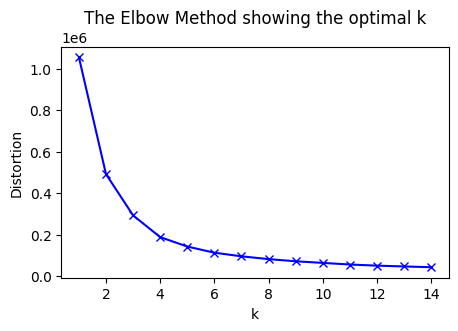

In [150]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Perform k-means clustering on the apartment data

In [151]:
# Number of clusters
k = 5

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.predict(X3)

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)

cluster
1    257
4    242
3    116
2     79
0     28
Name: count, dtype: int64

In [152]:
#Optional - Anzeigen der Clusterzugehörigkeit der einzelnen Wohnungen
print(kmeans_apmts.labels_, '\n')
print(kmeans_apmts.inertia_, '\n')
print(kmeans_apmts.cluster_centers_, '\n')
print(kmeans_apmts.feature_names_in_)

[4 1 4 3 4 4 4 1 4 0 2 1 0 3 2 2 4 2 4 2 4 1 4 2 4 4 1 2 1 2 4 3 4 4 1 2 1
 4 2 4 2 1 4 1 1 4 2 4 4 3 1 2 4 1 4 2 1 1 2 3 2 2 1 4 4 1 4 2 4 1 2 2 2 3
 1 2 2 2 3 4 1 1 2 4 1 1 2 2 1 3 4 4 2 2 2 4 3 1 1 4 2 2 3 4 1 1 1 4 4 4 4
 4 4 1 1 1 3 2 1 1 0 4 4 2 4 4 4 2 2 2 4 2 2 1 1 2 1 1 4 1 1 4 1 4 4 2 2 4
 1 2 4 1 1 2 1 1 4 2 1 2 4 4 2 2 1 2 4 2 4 4 1 2 1 1 2 4 3 4 2 4 4 4 1 1 4
 1 4 1 3 4 4 4 4 2 2 4 3 2 2 2 2 2 3 1 4 2 4 4 1 4 1 4 1 2 3 4 3 4 4 4 4 1
 4 4 4 4 4 4 4 1 3 1 2 4 3 1 4 1 1 1 3 3 1 4 4 1 3 1 3 0 4 3 4 3 3 1 1 1 4
 1 1 4 0 1 1 4 3 3 4 3 3 2 1 1 1 0 4 3 1 3 3 1 4 4 4 1 4 1 1 1 1 3 3 4 4 4
 1 4 4 4 1 1 3 4 4 1 3 1 2 1 4 4 4 1 1 3 3 4 1 4 0 1 4 1 1 4 1 4 1 1 2 1 4
 4 4 1 4 3 4 1 4 1 0 1 1 4 4 0 1 4 2 0 1 1 3 1 1 1 3 1 1 4 1 1 1 4 1 3 4 0
 4 4 4 1 4 4 4 4 4 2 1 3 4 4 2 4 4 1 1 1 4 1 4 4 1 2 2 4 3 4 3 1 1 4 1 3 4
 2 4 4 1 1 3 0 3 3 1 1 1 4 2 1 1 1 1 4 1 3 1 4 4 4 1 4 3 4 3 3 1 1 1 1 4 4
 1 4 1 3 3 4 1 3 1 1 3 4 3 2 2 4 4 1 3 1 3 3 3 4 3 1 4 1 1 1 3 3 4 4 1 4 4
 4 1 1 4 1 4 1 4 0 3 4 3 

### Plot the apartment clusters

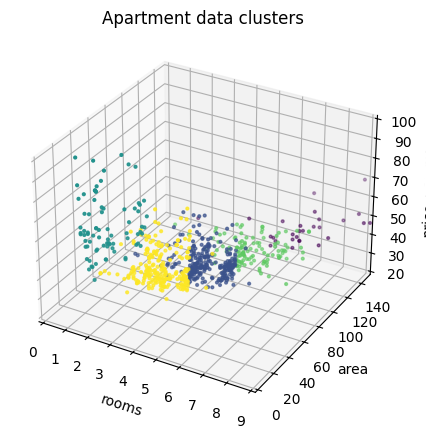

In [153]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()

### Calculate the Silhouette Score

In [154]:
print(f'Silhouette Score (k=5): {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score (k=5): 0.4487


In [155]:
#Optional 
k_values = [3, 4, 5, 6, 7]

# Dictionary, um Silhouette-Scores für verschiedene k-Werte zu speichern
silhouette_scores = {}

for k in k_values:
    # KMeans-Modell erstellen
    kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)
    
    # Silhouette-Score berechnen und speichern
    silhouette_scores[k] = silhouette_score(X3, kmeans_apmts.labels_)
    
    # Silhouette-Score pro k-Wert ausgeben
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]:.4f}")

# Den k-Wert mit dem höchsten Silhouette-Score finden
best_k = max(silhouette_scores, key=silhouette_scores.get)

# Ergebnisse ausgeben
print(f"\nOptimaler k-Wert laut Silhouette-Score: {best_k}")

Silhouette Score for k=3: 0.4550
Silhouette Score for k=4: 0.4708
Silhouette Score for k=5: 0.4487
Silhouette Score for k=6: 0.4145
Silhouette Score for k=7: 0.3911

Optimaler k-Wert laut Silhouette-Score: 4


### SW10 - Task 2 -  Excercise b
<a id='section_17'></a>

<p>Extend the data frame used for k-eamsn clustering (name = 'X3') by including additional numeric values /(e.g. lat,lon, pop_dens, tax_income, ...</p>

In [156]:
# Define a subset of the data frame for k-means clustering - Part 2
X4 = df[['rooms',
         'area',
         'price_per_m2',
         'pop_dens',
         'mean_taxable_income',
         'dist_supermarket']]

### SW10 - Task 2 -  Excercise c
<a id='section_18'></a>

<p>Use the elbow method to find the optimal numer of clusters k for the extended data frame (X4)</p>

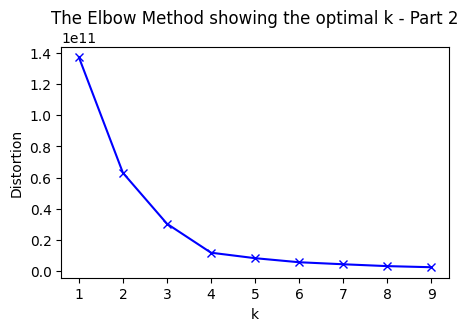

In [157]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,10)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X4)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot - Part 2
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k - Part 2')

plt.show()

### SW10 - Task 2 -  Excercise d
<a id='section_19'></a>

<p>Perform k-means clustering based on the optimal number of clusters.</p>

In [127]:
# Number of clusters
k = 4

# Perform k-means clustering
kmeans_apmts2 = KMeans(n_clusters=k, random_state=42).fit(X4)

# Add the clusters to data frame
X4['cluster'] = kmeans_apmts2.predict(X4)

# Show number of apartments per cluster
X4['cluster'].value_counts().sort_values(ascending=False)

cluster
2    391
0    286
1     37
3      8
Name: count, dtype: int64

### SW10 - Task 2 -  Excercise e
<a id='section_20'></a>

<p>Use the following Python code to derive the aatribute values from kmeans_apmts</p>

In [128]:
print(kmeans_apmts2.labels_, '\n')
print(kmeans_apmts2.inertia_, '\n')
print(kmeans_apmts2.cluster_centers_, '\n')
print(kmeans_apmts2.feature_names_in_)

[0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 3 2 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2
 2 2 0 0 0 0 0 1 2 2 1 0 0 3 2 2 2 2 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 

### SW10 - Task 2 -  Excercise f
<a id='section_21'></a>

<p>Explain the meaning of the utput of the code e)</p>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html</p>

<p>Explanation:</p>

<p>labels_: These are the cluster assignments for each data point. For example, if labels_ is [0, 0, 0, 1, 1, 1, 2, 2, 2], this means that the first three points belong to the first cluster, the next three to the second cluster and the last three to the third cluster. </p>

<p>inerita_: This is the sum of the squared distances of the data points to their nearest cluster centers. It is a measure of how close together the points in the clusters are </p>


<p> cluster_centers_: These are the coordinates of the cluster centers in the feature space. Each row corresponds to the coordinates of a cluster center. </p>

<p>feature_names_in_: This is relevant if you originally had a DataFrame with column names as input. In your case, the features are "rooms", "area", "price_per_m2", "pop_dens", "mean_taxable_income", "dist_supermarket". </p>

### SW10 - Task 2 -  Excercise g
<a id='section_22'></a>

<p>Calculate the Silhouette Score for 'means_apmts'. State whether the optimal value for k suggested by the elbow method is consistent with the value for k shwoing the highest Sihouette Score.</p>

In [130]:
print(f'Silhouette Score: {silhouette_score(X4, kmeans_apmts2.labels_):.4f}')

Silhouette Score: 0.6790


In [132]:
# Define a range of k values
k_values = [3, 4, 5, 6, 7]

# Dictionary, um Silhouette-Scores für verschiedene k-Werte zu speichern
silhouette_scores = {}

for k in k_values:
    # KMeans-Modell erstellen
    kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X4)
    
    # Silhouette-Score berechnen und speichern
    silhouette_scores[k] = silhouette_score(X4, kmeans_apmts.labels_)
    
    # Silhouette-Score pro k-Wert ausgeben
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]:.4f}")

# Den k-Wert mit dem höchsten Silhouette-Score finden
best_k = max(silhouette_scores, key=silhouette_scores.get)

# Ergebnisse ausgeben
print(f"\nOptimaler k-Wert laut Silhouette-Score: {best_k}")

Silhouette Score for k=3: 0.6190
Silhouette Score for k=4: 0.6790
Silhouette Score for k=5: 0.6686
Silhouette Score for k=6: 0.6562
Silhouette Score for k=7: 0.6604

Optimaler k-Wert laut Silhouette-Score: 4


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [158]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.0.0
Datetime: 2023-11-26 14:37:53
Python Version: 3.9.6
-----------------------------------
